1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`


In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

plt.rcParams['figure.figsize'] = [10, 10]

data = load_wine()
# print(data)
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Из данных исключите объекты класса 2

In [159]:
X = df.drop(df[df['target'] == 2].index)
y = X.target
X = X.drop(columns=["target"])

Отмасштабируйте признаки, используя класс StandardScaler с гиперпараметрами по умолчанию

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_scaled, y)
logit.score(X_scaled, y)

1.0

Постройте на графике значения коэффициентов
barh ('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html')

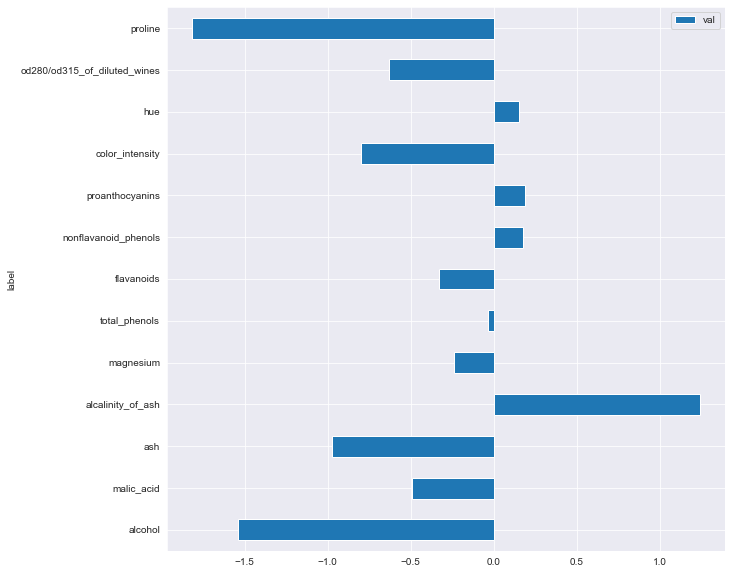

In [162]:
coefs = pd.DataFrame({'label':data.feature_names , 'val': logit.coef_[0]})
coefs.plot.barh(x='label', y='val')
plt.show()
# total_phenols оказался наименее значимым